## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [2]:
# Note -  EDA will always be performed on training data

file_path = r"C:\Users\ashis\OneDrive\Desktop\flights-sagemaker-project\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-05-27,Mumbai,Hyderabad,02:35:00,04:05:00,90,0.0,No info,2754
1,Jet Airways,2019-06-09,Delhi,Cochin,14:00:00,12:35:00,1355,1.0,In-flight meal not included,10262
2,Spicejet,2019-05-06,Chennai,Kolkata,08:20:00,10:35:00,135,0.0,No check-in baggage included,3859
3,Air India,2019-05-24,Kolkata,Banglore,14:35:00,14:35:00,1440,1.0,No info,6528
4,Vistara,2019-03-12,Mumbai,Hyderabad,07:30:00,19:55:00,745,1.0,No info,12080
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-06,Delhi,Cochin,06:40:00,12:00:00,320,1.0,No info,5647
636,Jet Airways,2019-03-18,Banglore,New Delhi,16:55:00,23:00:00,365,1.0,No info,13555
637,Indigo,2019-03-06,Delhi,Cochin,07:30:00,21:00:00,810,1.0,No info,14871
638,Air Asia,2019-06-15,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No info,4282


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High-Level Summary of Data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [6]:
train.describe(include="number") #As we only need for numeric variables  

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,606.492188,0.807813,9233.350000
std,466.500389,0.632160,4693.361127
min,75.000000,0.000000,1840.000000
25%,170.000000,0.000000,5498.000000
50%,505.000000,1.000000,8586.000000
75%,861.250000,1.000000,12384.000000
max,2245.000000,3.000000,52285.000000


- We have very extreme values in `duration` column (min. value - 75mins and max. value - 2245 mins)

In [7]:
(
    train
    .assign(total_stops = train["total_stops"].astype(str)) #total stops - categorical
    .describe(include=str)

)

TypeError: numpy string dtypes are not allowed, use 'str' or 'object' instead

- In `airline` column - Jet Airways occurs 225 times, that's almost 1/3rd times
- Most of the flights in our dataset started from Delhi
- `total_stops` has 1 as the most common value - 364/640 - 50% of values

## 4. High-level analysis of Missing Values

In [ ]:
eda_helper_functions.missing_info(train) #Shows only columns that have the missing values 

,count,percentage
variable,,


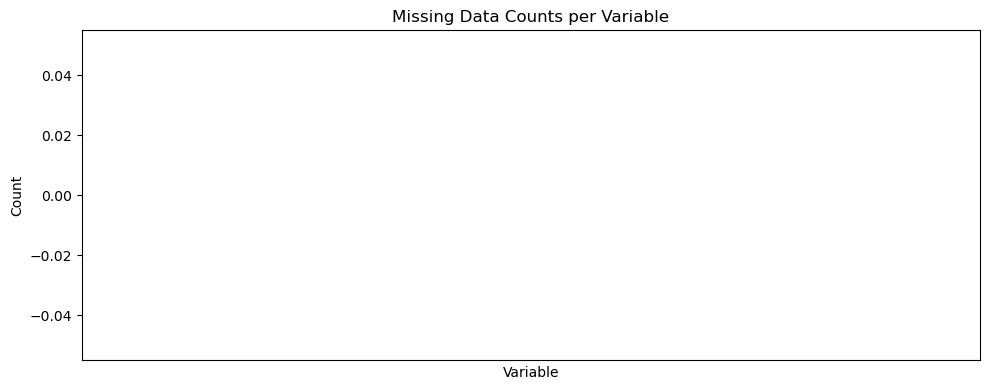

In [ ]:
eda_helper_functions.plot_missing_info(train)

#Can use Missingno library as well

## 5. High-Level analysis of Outliers

In [ ]:
# Can use an algorithm c/d isolation forest.
# - It is an ensemble algorithm with many trees (random forest)
# - Outliers will get isolated/captured at the top of the decision trees itself
# Return -1 - if outlier, 1 - not a outlier
# Note- isolation forest works on numeric variables - so look at numeric variables


In [ ]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [ ]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    # .duration
    # .describe()
)

#Use query to filter anything

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Indigo,2019-05-27,Mumbai,Hyderabad,2026-02-25 02:35:00,2026-02-25 04:05:00,90,0.0,No info,2754,-1
1,Jet Airways,2019-09-06,Delhi,Cochin,2026-02-25 14:00:00,2026-02-25 12:35:00,1355,1.0,In-flight meal not included,10262,-1
2,Spicejet,2019-06-05,Chennai,Kolkata,2026-02-25 08:20:00,2026-02-25 10:35:00,135,0.0,No check-in baggage included,3859,-1
3,Air India,2019-05-24,Kolkata,Banglore,2026-02-25 14:35:00,2026-02-25 14:35:00,1440,1.0,No info,6528,-1
6,Jet Airways,2019-01-03,Banglore,New Delhi,2026-02-25 08:00:00,2026-02-25 07:40:00,1420,1.0,No info,22270,-1
...,...,...,...,...,...,...,...,...,...,...,...
626,Spicejet,2019-04-21,Kolkata,Banglore,2026-02-25 09:00:00,2026-02-25 11:25:00,145,0.0,No check-in baggage included,4439,-1
628,Jet Airways,2019-09-06,Kolkata,Banglore,2026-02-25 18:55:00,2026-02-25 20:45:00,1550,1.0,In-flight meal not included,10844,-1
629,Jet Airways,2019-06-03,Banglore,New Delhi,2026-02-25 11:40:00,2026-02-25 07:40:00,1200,1.0,No info,16736,-1
630,Jet Airways,2019-09-06,Delhi,Cochin,2026-02-25 05:30:00,2026-02-25 04:25:00,1375,2.0,In-flight meal not included,10368,-1


## 6. Pair Plots

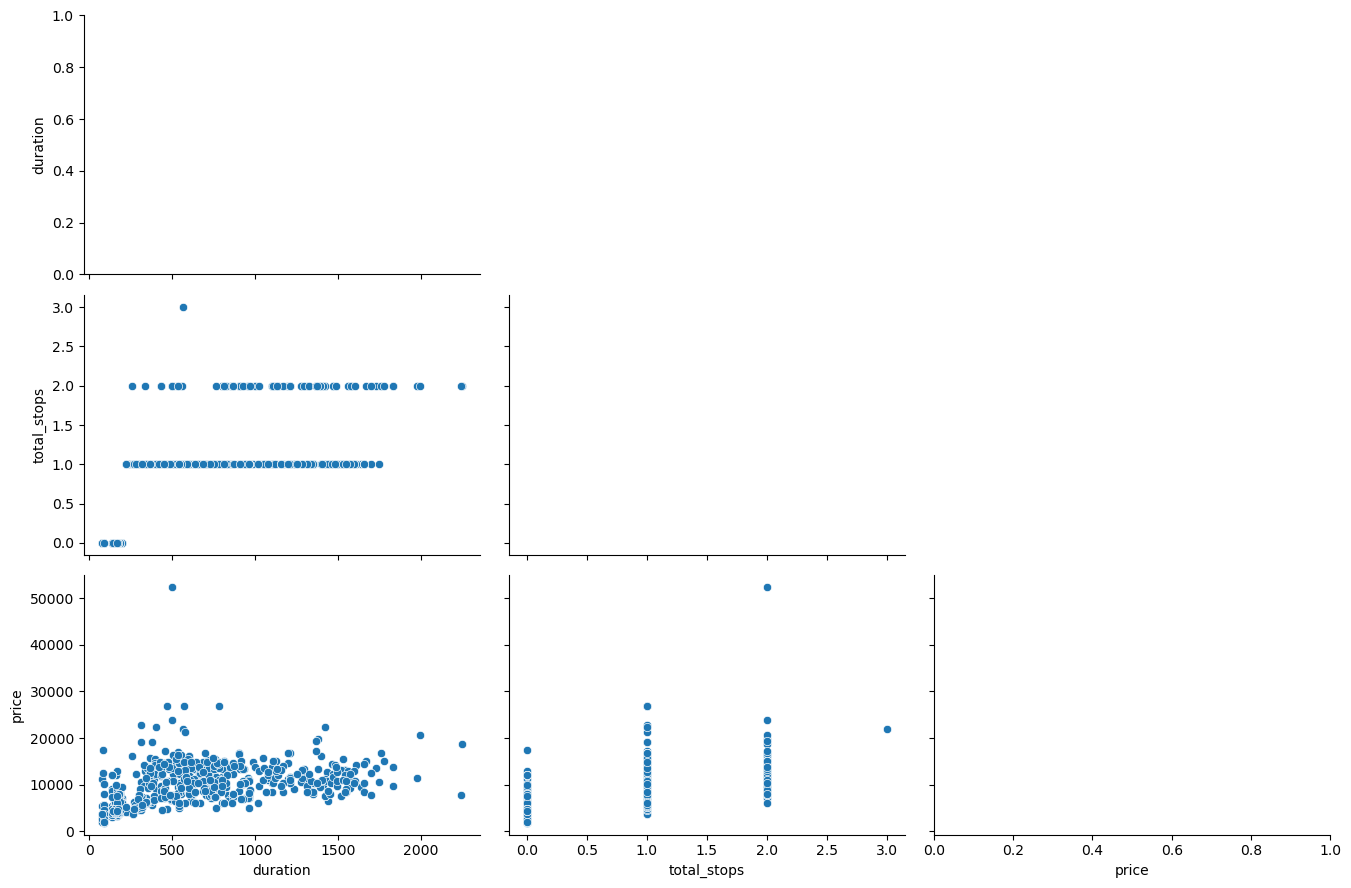

In [ ]:
eda_helper_functions.pair_plots(train) # Pairwise scatter plots of numeric variables

- Linear relation b/w `duration` and `price` columns i.e longer the flights higher the price
- We can't infer much info b/w `total_stops` and `price` from this graph
- In `duration` vs `total_stop` we can see direct flights are for much less duration than the flights where there are 1 or >1 stops

## 7. Correlation Analysis

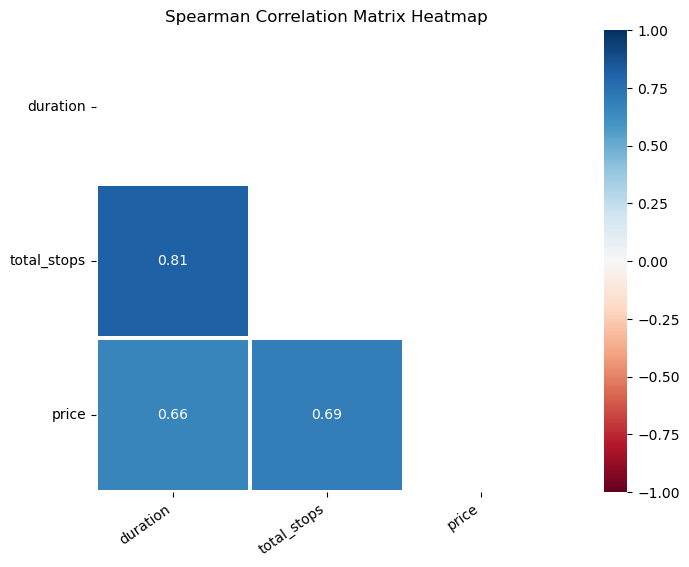

In [ ]:
eda_helper_functions.correlation_heatmap(train) # For numerical variables


- We confirm this correlation b/w duration and price from plot and correlation value that as the duration increases, price also increases
- For price vs total_stops - Due to extreme values as we can see from the plot, the correlation values got influenced and we got higher correlation values.
- duration and total_stops have highest score, i.e. they are strongly correlated.
- We can't have such highly correlated features in linear models like Regression, Ridge, Lasso. Could be fine with Tree Based models.

In [ ]:
correlation_matrix = train.corr(method='spearman', numeric_only=True)
correlation_matrix

,duration,total_stops,price
duration,1.000000,0.812512,0.657633
total_stops,0.812512,1.000000,0.687625
price,0.657633,0.687625,1.000000


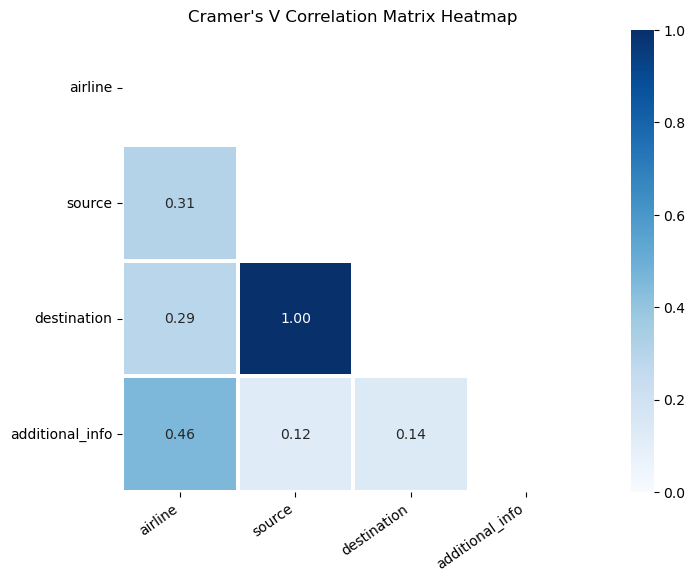

In [ ]:
eda_helper_functions.cramersV_heatmap(train) # For Categorical variables (Based on chi-square test)

- Note - Here `source` and `destination` columns are having correlation 1 as they would be having many values overlapping, therefore not much relevant information.

## 8. Detailed Analysis

In [ ]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='str')

### 8.1 airline

In [ ]:
train.airline

0                 Indigo
1            Jet Airways
2               Spicejet
3              Air India
4                Vistara
             ...        
635               Indigo
636          Jet Airways
637               Indigo
638             Air Asia
639    Multiple Carriers
Name: airline, Length: 640, dtype: str

In [ ]:
eda_helper_functions.cat_summary(train, "airline")

0                 Indigo
1            Jet Airways
2               Spicejet
3              Air India
4                Vistara
             ...        
635               Indigo
636          Jet Airways
637               Indigo
638             Air Asia
639    Multiple Carriers
Name: airline, Length: 640, dtype: str

Data Type      : str
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,225


,count,percentage
category,,
Jet Airways,225,0.351562
Indigo,112,0.175000
Air India,101,0.157812
Multiple Carriers,86,0.134375
Spicejet,55,0.085938
Vistara,27,0.042188
Goair,17,0.026562
Air Asia,17,0.026562


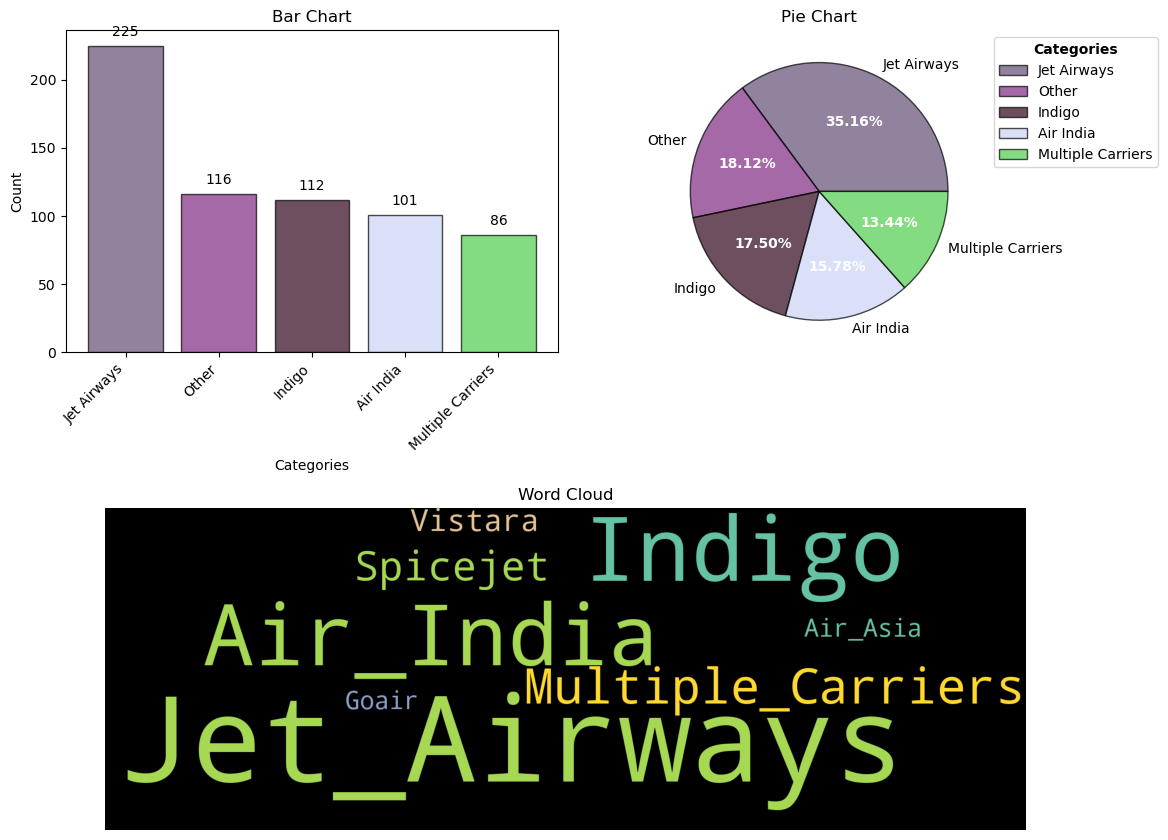

In [ ]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=True, k=4)

- We can retain the most frequent category and group the less frequent category as one. (This is done for high cardinality features)

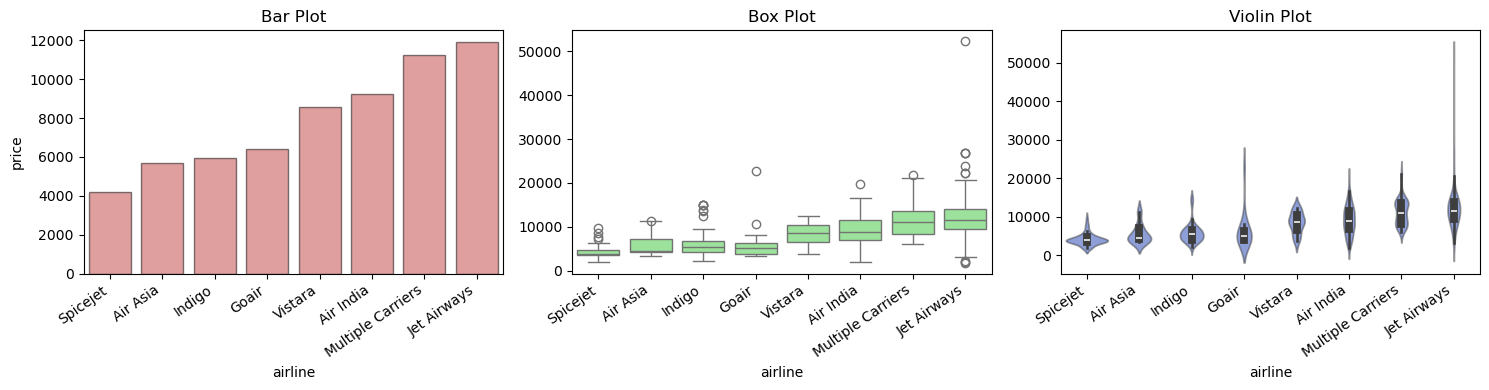

In [ ]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

- Bar Plot - Shows the mean of price for each category - For every flight, avg. price is different and we can see the increasing trend. This clearly tells us that airline is a good feature to predict prices, because based on airlines prices are varying.
- Box Plot - Shows the distribution/variance of prices for each category - Also shows potential outliers
- Violin Plot - Box Plot + KDE Values - With the help of violin plot we can see the shape of distribution too i.e whether the values are left skewed right skewed (Ex- in SpiceJet - Right skewed - majority of the flights are cheap only few are expensive)
- Also for every category(airline) violin plot's shape is different, so it is a good indicator of the price

In [ ]:
# Hypothesis Testing - In above plots we saw some relationship b/w airplane and prices - we will confirm these by hypothesis testing

eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 48.81475840122511
- p-value              : 1.9355839551062016e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 282.38093264362664
- p-value              : 3.486582411497654e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


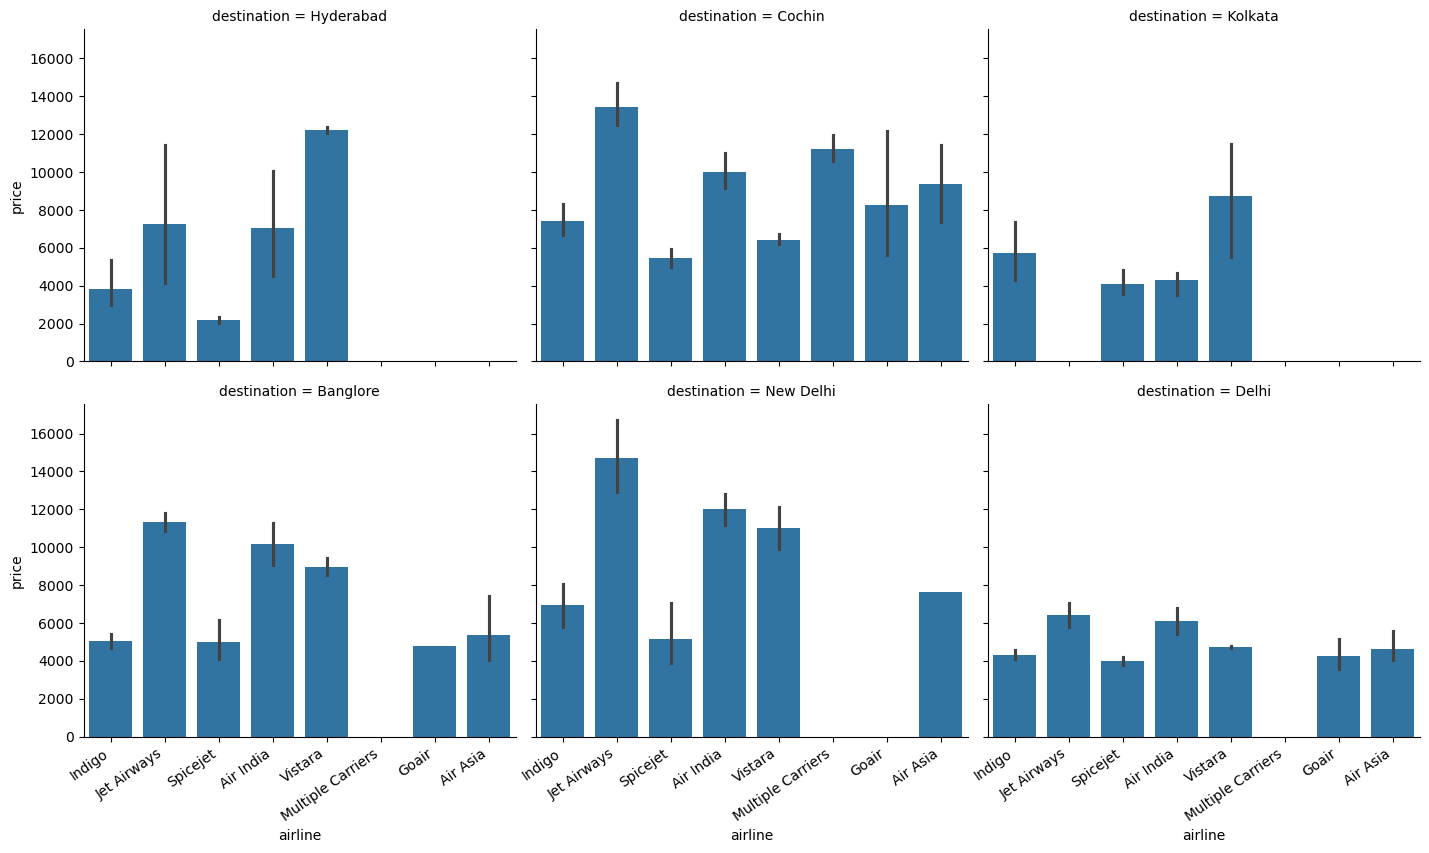

In [ ]:
airline_grid = sns.FacetGrid(
    data = train,
    col='destination',
    sharey=True,
    col_wrap=3,
    height=4,
    aspect=1.2
)       # for multivariate analysis we can use seaborn's facet grid

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())


for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [ ]:
# It is date-time column
train.date_of_journey

0     2019-05-27
1     2019-09-06
2     2019-06-05
3     2019-05-24
4     2019-12-03
         ...    
635   2019-06-03
636   2019-03-18
637   2019-06-03
638   2019-06-15
639   2019-04-24
Name: date_of_journey, Length: 640, dtype: datetime64[us]

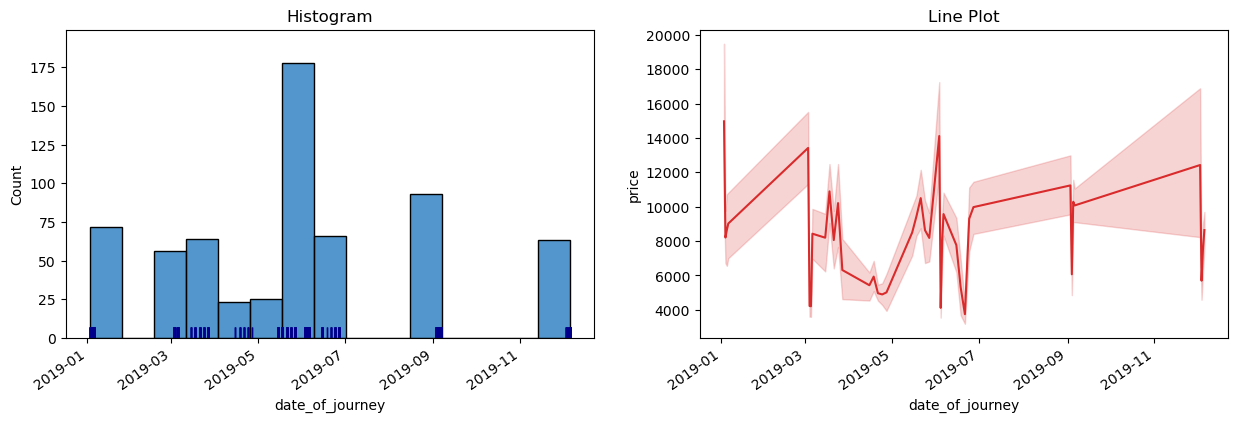

In [ ]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var='date_of_journey',
    target='price'
)

- From histogram we can see that many flights are used in summer months.
- From Line-Plot we can see that flight prices are decreasing from Jan to May and then increasing in winters.

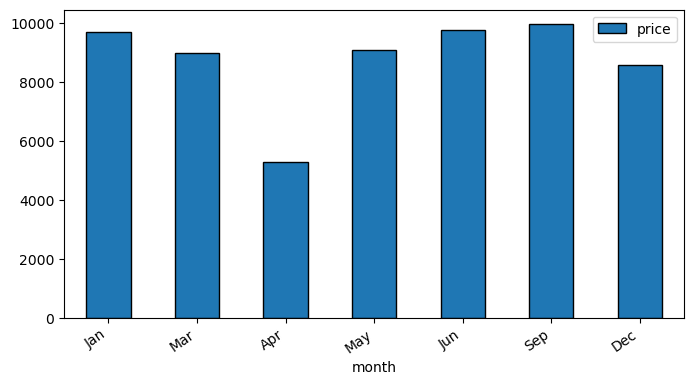

In [ ]:
# For every month if we want avg price
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='ME'))
    .price.mean()
    .dropna() #removes empty months
    .to_frame()
    .set_axis(["Jan","Mar", "Apr","May", "Jun", "Sep", "Dec" ], axis=0)
    .rename_axis(index='month')
    .plot(kind="bar", figsize=(8, 4), edgecolor='black')
)

ax = plt.gca() #get current axis
eda_helper_functions.rotate_xlabels(ax)

- From here we can see that date of journey is also a good feature to predict prices

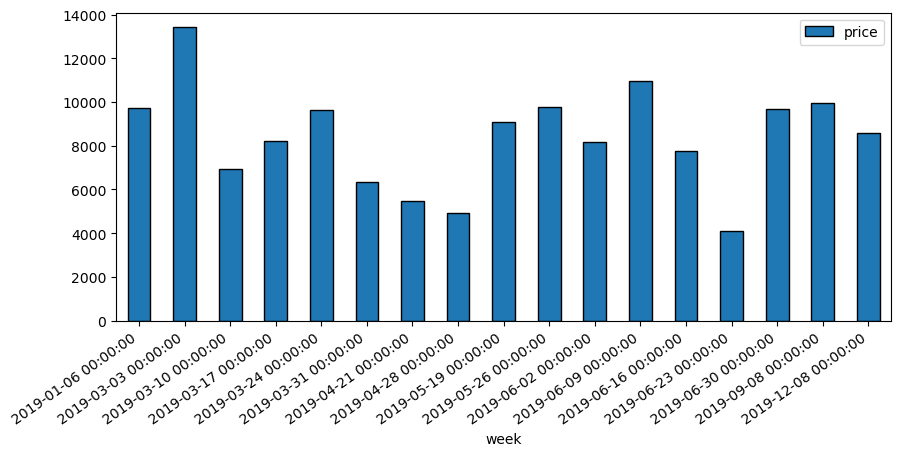

In [ ]:
# For every week if we want avg price
(
    train
    .groupby(pd.Grouper(key='date_of_journey', freq='W'))
    .price.mean()
    .dropna() #removes empty weeks
    .to_frame()
    .rename_axis(index='week')
    .plot(kind="bar", figsize=(10, 4), edgecolor='black')
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)


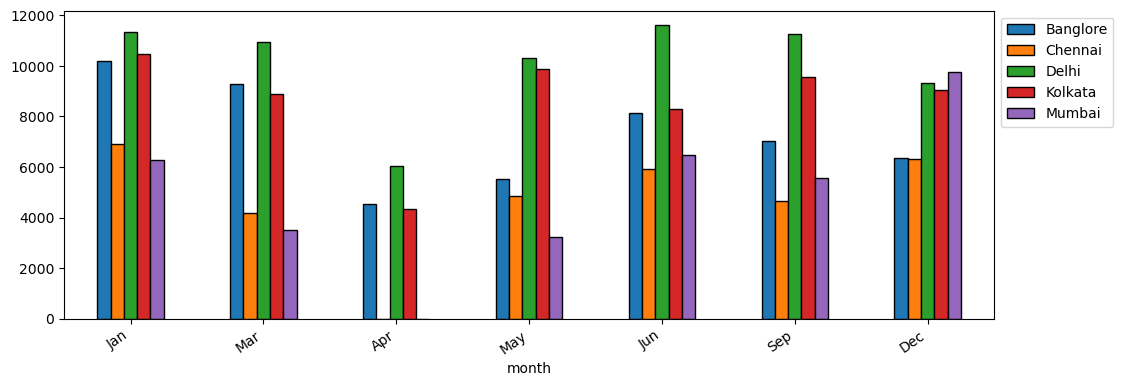

In [ ]:
# Inside each month,  what is the avg price of each airline - Multivariate analysis
# Better than this, find avg price from source

(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="ME"), 'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["Jan","Mar", "Apr","May", "Jun", "Sep", "Dec" ], axis=0)
    .rename_axis(index='month')
    .plot(kind="bar", figsize=(12, 4), edgecolor='black')
)


ax = plt.gca()

ax.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

#### Observations

- Delhi consistently has the highest average ticket prices.
- Chennai generally has the lowest fares.
- Prices peak around June and September,indicating seasonality(vacation).
- April shows a price dip across most cities.
- Mumbai sees a noticeable rise in December.
- Overall, ticket prices vary by both source city and seasonal demand.


### 8.3 dep_time

In [ ]:
train.dep_time

0     2026-02-25 02:35:00
1     2026-02-25 14:00:00
2     2026-02-25 08:20:00
3     2026-02-25 14:35:00
4     2026-02-25 07:30:00
              ...        
635   2026-02-25 06:40:00
636   2026-02-25 16:55:00
637   2026-02-25 07:30:00
638   2026-02-25 04:55:00
639   2026-02-25 07:10:00
Name: dep_time, Length: 640, dtype: datetime64[us]

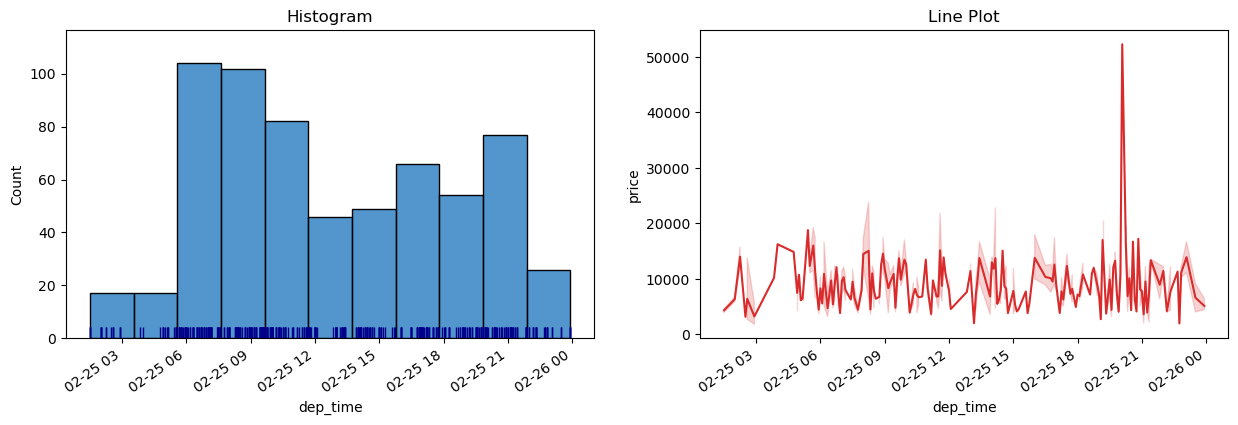

In [ ]:
eda_helper_functions.dt_univar_plots(train, 'dep_time', 'price')

- From above histogram, we clearly observe that most flights are booked b/w 7:00am to 12:00pm
- From line plot, we observe that prices of flights from 6pm to 10pm are high

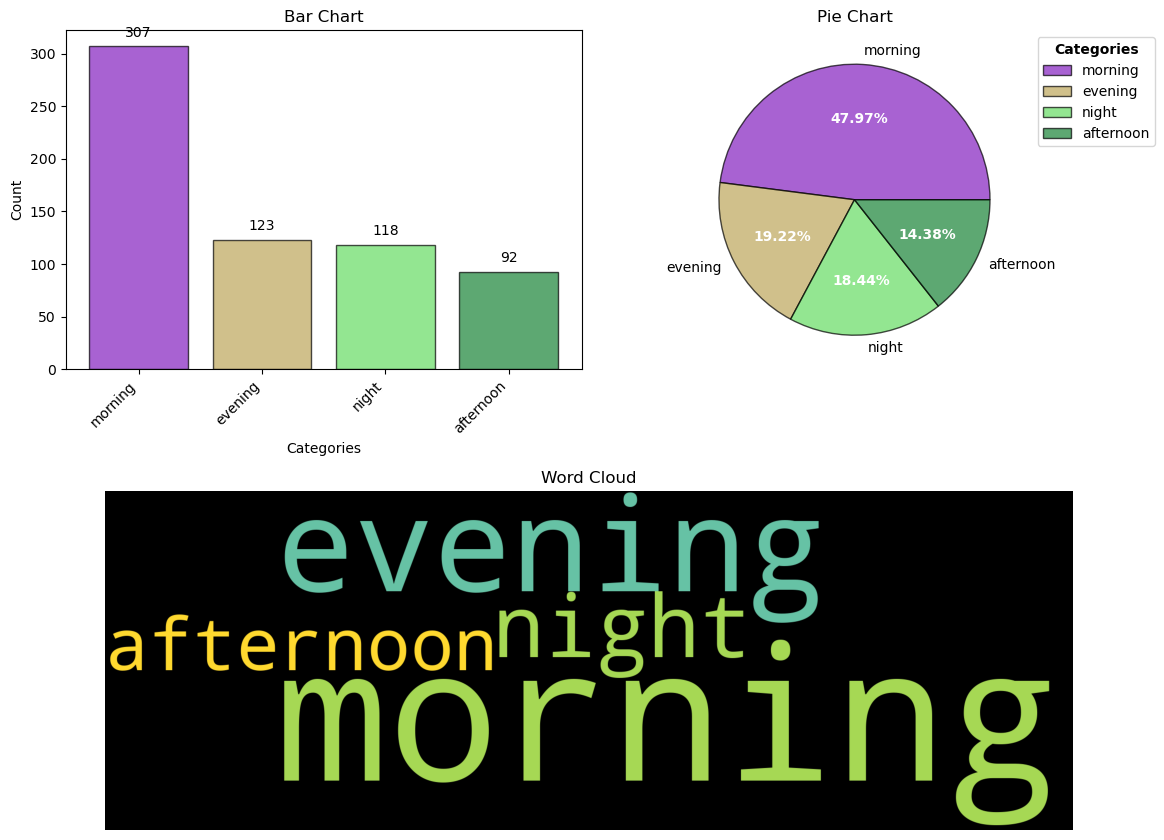

In [ ]:
# We see that for different part of the day we have different trends, so we can convert hours into part of the day
# np.select([condition1, condition2], [value1, value2], default='abc')

(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.cat_univar_plots, "dep_time")
)

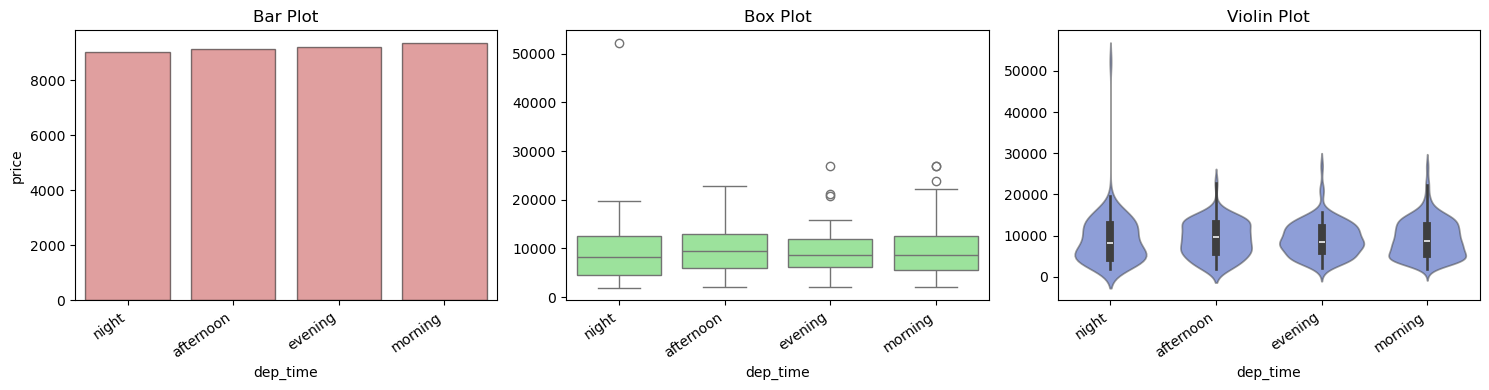

In [ ]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots,"price", "dep_time")
)

- Can observe clearly that morning flights are most expensive ones followed by evenin then afternoon

### 8.4 duration

In [ ]:
train.duration

0        90
1      1355
2       135
3      1440
4       745
       ... 
635     320
636     365
637     810
638     170
639     540
Name: duration, Length: 640, dtype: int64

In [ ]:
eda_helper_functions.num_summary(train, 'duration')

0        90
1      1355
2       135
3      1440
4       745
       ... 
635     320
636     365
637     810
638     170
639     540
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,505.00
75,861.25
90,1381.00
95,1530.50
99,1769.15


,value
mean,606.492188
trimmed mean (5%),574.826389
trimmed mean (10%),548.271484
median,505.000000


,value
var,217622.613397
std,466.500389
IQR,691.250000
mad,335.000000
coef_variance,0.769178


,value
skewness,0.902992
kurtosis,0.003787


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 2.064478380564636e-20
Test Statistic       : 0.8958582497064478
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 20.665367709457314
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


- Observation from Percentile values, that 50% flights are more than 500 minutes (8hrs) duration in our dataset i.e. we have extremely long flights in our dataset.
- Note- Trimmed mean - we remove lower 5% values and top 5% values and take mean of the remaining values. We do this to remove the extreme values (outliers) and get more accurate representation of central tendency which is approaching towards median.
- From the mean & median we can see that our date is extremely skewed towards right side.
- Std dev says that w.r.t mean value on average our flights are + or - 500 minutes.
- We confirm the positive skewness by the value 0.90 which is postive.
- We confirm the not normal distribution using the above hypothesis tests.

In [ ]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    505.00
0.75    861.25
Name: duration, dtype: float64

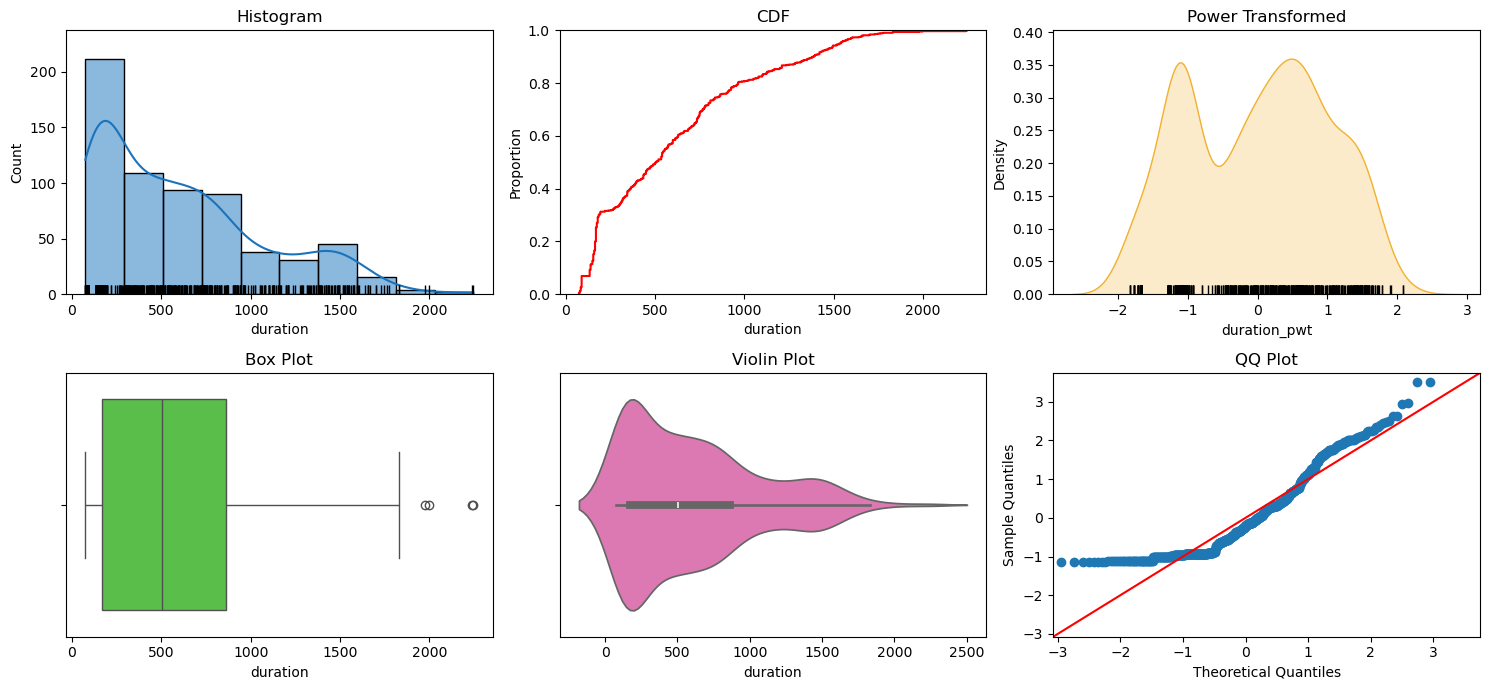

In [ ]:
eda_helper_functions.num_univar_plots(train, "duration")

- From Histogram, we can observe that most of the flights have short duration, there are very few flights which have very high duration. There is one flight with >2500 minutes. (from the rug plot)
- From CDF, we observe around 50–60% of flights are completed within roughly 800–900 minutes. The curve flattens after ~1500 minutes, indicating very few long-duration flights.
- Power Transform (Power(x) = X^lambda) - Tries to make our feature's PDF as symmetric as possible by calculating some exponent of the column.
- QQ Plot - A Q-Q plot (Quantile–Quantile plot) checks whether your data follows a specific theoretical distribution (most commonly normal distribution).
- In our case, it is not following normal distribution.


- Note - Symmetric and Normal Distribution are different

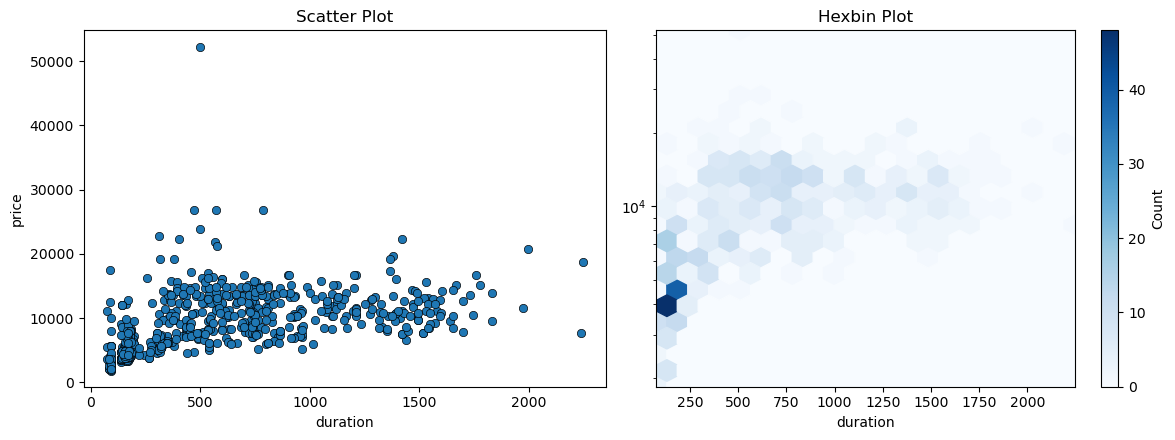

In [ ]:
eda_helper_functions.num_bivar_plots(
    data = train,
    var_x = "duration",
    var_y = "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize = 20,
        cmap = "Blues"
    )
)

- Hexbin plot - For every combination of values, it groups them into bins, then counts how many observations fall inside each bin. Uses colour intensity to show density of values.
- From Hexbin plot we observe  that highest concentraion of flights is around 300 minuts and price is around 5000. 
- Why Hexbins ? - Scatter plot looks crowded in dense areas. Hexbin clearly highlights where most data points are concentrated using darker hexagons.


In [ ]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4800863374009196
- p-value              : 3.307003095333684e-38
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6576329259039724
- p-value              : 1.5857093300316098e-80
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


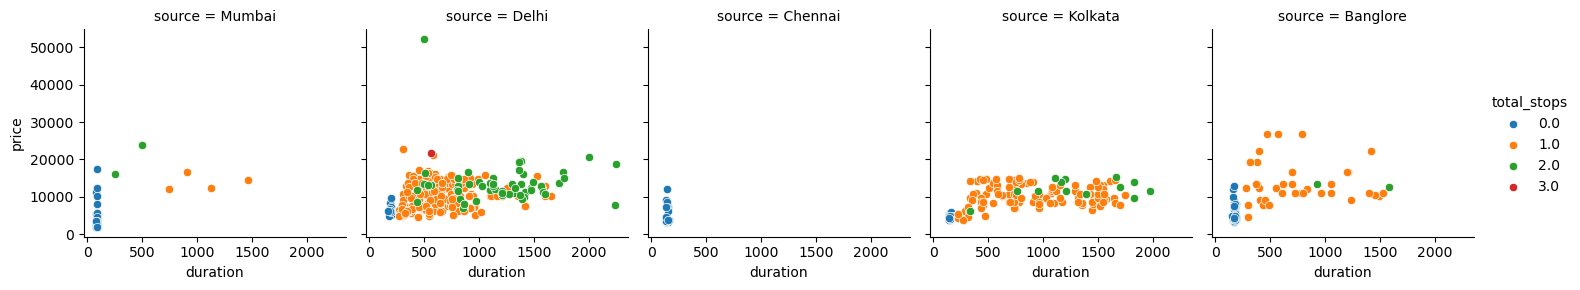

In [ ]:
duration_grid = sns.FacetGrid(
    data = train,
    col = "source",
    hue = "total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

- We have extremely small duration flights in Mumbai, Bangalore and Chennai & price of these goes upto 10,000.
- Delhi has the highest spread of flights, Chennai has only short flights.
- After adding 3rd dimension (total_stops) - Chennai has only direct flights, similarly for Mumbai too, most of them are direct flights, very few are with 1 or 2 stops.
- Delhi has the widest spread in duration & price and has some vey high price outliers (~50k+). It is also most diverse in stop combinations.
- In Kolkata  - majority flights are with 1-stop with mid-range pricing.
- In Bangalore too, moderate spread and mostly 1-stop flights dominate.
- OVERALL - Stops strongly influence duration & indirectly price. Most flights accross cities are 1-stop, mid-duration and mid-price range.

## 9. Automated EDA

- If we have 100 columns or even 1000 columns, what can we do?
  - **Pandas Profiling (ydata-profiling)**
  - **Sweetviz**
  - **Autoviz**
  - **D-Tale**

In [8]:
from ydata_profiling import ProfileReport

In [9]:
report = ProfileReport(train)

In [10]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 275.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]